In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_continuous_lyapunov

In [54]:
##Wavenumbers
k = 12 * np.pi
m = 6 * np.pi
m_U = 14 * np.pi #vertical wavenumber
##

r_m = 0.1
N0_squared = 100/4


k_e = np.sqrt(k**2 + m**2)
k_plus = np.sqrt(k**2 +(m+m_U)**2)

W_e = np.array([[-1, k / (k_e**2)],
                [-k * N0_squared, -1]])
W_plus = np.array([[-1, -k / (k_plus**2)],
                [k * N0_squared, -1]])

W = np.block([[W_e, np.zeros((2, 2))],
             [np.zeros((2, 2)), W_plus]])

L_e = np.array([[-(k*(k_plus**2 - m_U**2)) / (2 * (k_e**2)), 0],
                [0, k / 2]])

L_plus = np.array([[-(k*(m_U**2 - k_e**2)) / (2 * (k_plus**2)), 0],
                [0, -k / 2]])

L = np.block([[np.zeros((2, 2)), L_e],
             [L_plus, np.zeros((2, 2))]])

In [64]:
dt = 0.01
T = 100
t = np.linspace(0,T,int(T/dt)+1)

C = np.zeros((4,4,len(t)))
U = np.zeros((len(t),1))
R = np.zeros((len(t),1))

Q = np.zeros((4,4))
Q[0, 0] = 8 / (k_e**2)

epsilon = 0.01
r_m = 0.1

In [65]:
C[:,:,0] = 0
U[0] = 0.001

for i in range(0,len(t)-1):

                A = W + U[i]*L

                R[i+1] = C[0,2,i]*(0.25 * k * ((k_plus**2) - (k_e**2)))

                C[:,:,i+1] = C[:,:,i]+ dt*(A @ C[:,:,i]  + C[:,:,i] @ A.T + epsilon*Q)
                # C[:,:,i+1] = (A @ C[:,:,i]  + C[:,:,i] @ A.T + epsilon*Q)

                U[i+1] = U[i] + dt*(-r_m*U[i]+R[i])
                

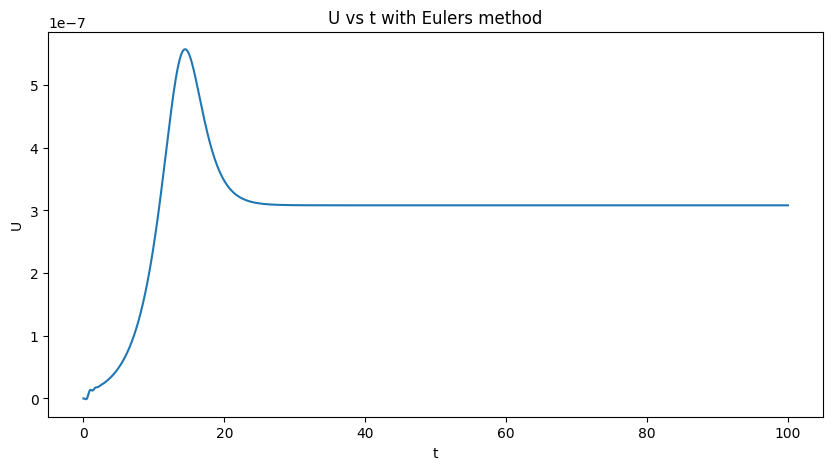

In [68]:
plt.figure(figsize=(10, 5))
# plt.plot(U,R)
plt.plot(t, C[0,2,:])
plt.xlabel('t')
plt.ylabel('U')
plt.title('U vs t with Eulers method')
plt.show()

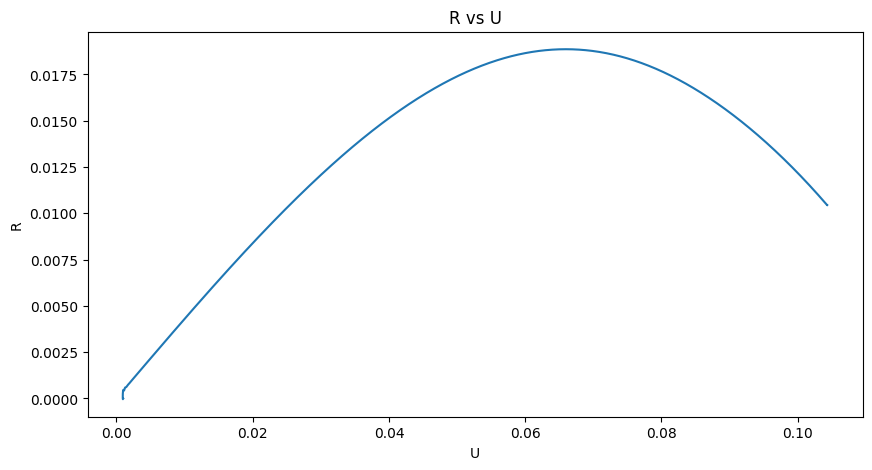

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(U,R)
plt.xlabel('U')
plt.ylabel('R')
plt.title('R vs U')
plt.show()

In [58]:
dt = 0.01
T = 100
t = np.linspace(0,T,int(T/dt)+1)

U = np.zeros((len(t),1))

C1 = np.zeros((4,4,len(t)))

Q = np.zeros((4,4))
Q[0, 0] = 8 / (k_e**2)

epsilon = 0.01
r_m = 0.1

U[0] = 0.001
# U[0] = 0.14

A = W + U[0]*L
C1[:,:,0] = solve_continuous_lyapunov(A, -epsilon*Q)


for i in range(0,len(t)-1):
    A = W + U[i]*L
    R = C1[0,2,i]*(0.25 * k * ((k_plus**2) - (k_e**2)))
    C1[:,:,i+1] = solve_continuous_lyapunov(A, -epsilon*Q)
    U[i+1] = U[i] + dt*(-r_m*U[i]+R)


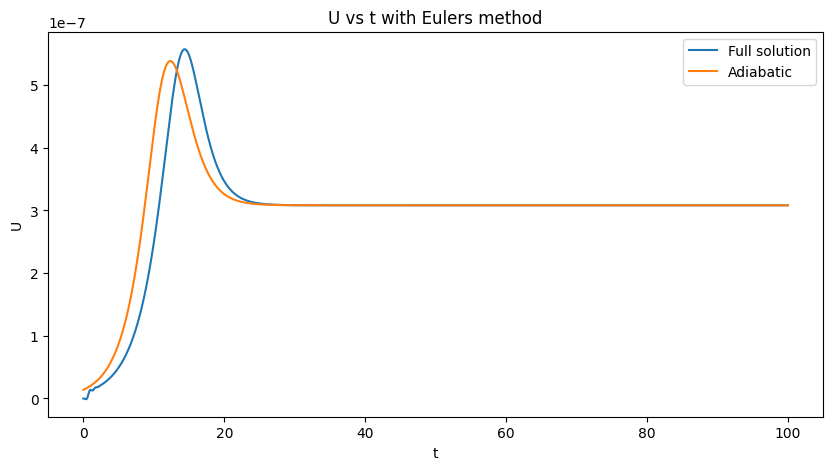

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(t, C[0,2,:], label = 'Full solution')
plt.plot(t, C1[0,2,:], label = 'Adiabatic')
# plt.axhline(y=C[0,0], color='r', linestyle='-')
plt.xlabel('t')
plt.ylabel('U')
plt.title('U vs t with Eulers method')
plt.legend()
plt.show()

In [14]:
print(C[:,:,-2])

[[-9.04486315e-06  5.49111822e-04 -4.42300801e-07  7.66299720e-04]
 [ 5.49111822e-04 -1.60957140e+00  1.15172789e-04  2.16563159e-01]
 [-4.42300801e-07  1.15172789e-04 -3.61500874e-07  5.54244068e-05]
 [ 7.66299720e-04  2.16563159e-01  5.54244068e-05 -2.51586309e-01]]
